In [ ]:
DATA ANALYSIS AND DATA SCIENCE WITH PYTHON
Task 5: Classification Tasks Overview

In [ ]:
Task 1: Student Pass/Fail Prediction

In [ ]:
Step 1: Dataset Selection
Columns Required:

Study Hours: Numeric (e.g., 10, 15, 20)
Attendance: Percentage (e.g., 70%, 80%, 90%)
Pass: Binary (0 for fail, 1 for pass)

In [1]:
import pandas as pd

data = {
    'Study_Hours': [10, 15, 20, 5, 25, 30, 2],
    'Attendance': [70, 80, 90, 40, 95, 98, 30],
    'Pass': [1, 1, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)
print(df.head())

   Study_Hours  Attendance  Pass
0           10          70     1
1           15          80     1
2           20          90     1
3            5          40     0
4           25          95     1


In [ ]:
Step 2: Data Exploration

In [2]:
# Check for Missing Values & Outliers
print(df.isnull().sum())  # Check missing values
print(df.describe())  # Summary statistics

Study_Hours    0
Attendance     0
Pass           0
dtype: int64
       Study_Hours  Attendance      Pass
count     7.000000    7.000000  7.000000
mean     15.285714   71.857143  0.714286
std      10.355583   27.033489  0.487950
min       2.000000   30.000000  0.000000
25%       7.500000   55.000000  0.500000
50%      15.000000   80.000000  1.000000
75%      22.500000   92.500000  1.000000
max      30.000000   98.000000  1.000000


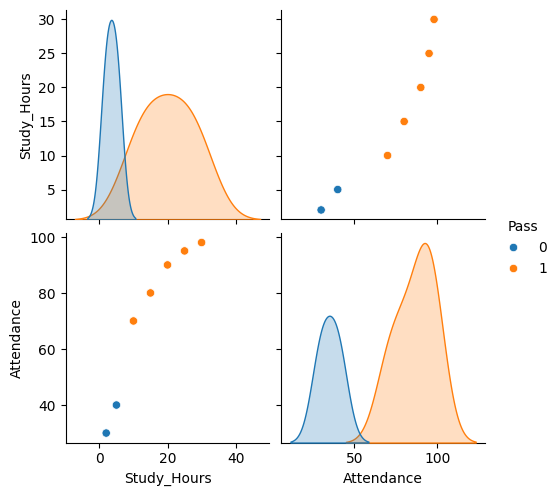

In [3]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="Pass")
plt.show()

In [ ]:
Step 3: Model Training (Logistic Regression)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = df[['Study_Hours', 'Attendance']]
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
Step 4: Model Evaluation

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute confusion matrix with specified labels
labels = [0, 1]  # Ensure both "fail/pass" or "negative/positive" labels are included
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 1.00
Confusion Matrix:
 [[0 0]
 [0 2]]


In [ ]:
Task 2: Sentiment Analysis with Natural Language Processing

In [10]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [11]:
from nltk.tokenize import word_tokenize
text = "Hello! How are you?"
tokens = word_tokenize(text)
print(tokens)  # Output: ['Hello', '!', 'How', 'are', 'you', '?']

['Hello', '!', 'How', 'are', 'you', '?']


In [14]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load Excel file with full path
file_path = r"C:\Users\Ashish\OneDrive\Desktop\Jupyter Notebook\Internship Task 4\Housing.xlsx"
df = pd.read_excel(file_path)  

# Display first few rows to verify
print(df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [15]:
from IPython.display import display

display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# Text Cleaning Function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(f'[{string.punctuation}]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [t for t in tokens if t not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatization
    return ' '.join(tokens)

df['Cleaned_Review'] = df['Review_Text'].apply(preprocess_text)

In [ ]:
Step 2: Text Vectorization (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Review'])
y = df['Sentiment'].map({'positive': 1, 'negative': 0})  # Convert labels to 0,1

In [ ]:
Step 3: Model Training (Logistic Regression)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
Step 4: Model Evaluation